## IMPORT TOOLS AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score

from joblib import dump, load

randomseed = 15
pd.set_option('display.width', 1000000000)

## DATA HANDLING

##### IMPORT DATA

In [2]:
np.random.seed(randomseed)
flatPrices = pd.read_csv('flat-prices-new.csv')
flatPrices = flatPrices.drop(flatPrices.columns[0], axis=1).sample(frac=1)
print(flatPrices)
flatPrices.info()

            month           town  flat_type block          street_name storey_range  floor_area_sqm         flat_model lease_commence_date  remaining_lease  resale_price
98183  2021-12-01        HOUGANG     5 ROOM   361        HOUGANG AVE 5     04 TO 06           123.0           Improved          1992-10-08        69.833333      612000.0
95730  2021-09-01       CLEMENTI     2 ROOM   423       CLEMENTI AVE 1     16 TO 18            49.0            Model A          2013-10-03        91.083333      340000.0
71327  2020-06-01        GEYLANG     2 ROOM    39           CIRCUIT RD     01 TO 03            44.0           Standard          1971-03-14        49.750000      190000.0
79271  2020-09-01        PUNGGOL     4 ROOM  273B           PUNGGOL PL     13 TO 15            93.0  Premium Apartment          2013-07-04        91.833333      525000.0
30204  2018-07-01     ANG MO KIO     3 ROOM   432    ANG MO KIO AVE 10     04 TO 06            67.0     New Generation          1979-02-08        59.5

#####  CONVERT DATE COLUMNS INTO INTEGERS

In [3]:
flatPrices['month'] = flatPrices['month'].astype(str).replace('-', '', regex=True).astype(int)
flatPrices['lease_commence_date'] = flatPrices['lease_commence_date'].astype(str).replace('-', '', regex=True).astype(int)

##### CONVERT DATE COLUMNS INTO INTS

##### CONVERT CATEGORICAL COLUMNS INTO NUMBERS USING PANDAS

In [4]:
for label, content in flatPrices.items():
    if pd.api.types.is_string_dtype(content):
        flatPrices[label] = content.astype('category')
        flatPrices[label] = pd.Categorical(flatPrices[label]).codes

In [5]:
flatPrices.info()
flatPrices

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125464 entries, 98183 to 7624
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                125464 non-null  int32  
 1   town                 125464 non-null  int8   
 2   flat_type            125464 non-null  int8   
 3   block                125464 non-null  int16  
 4   street_name          125464 non-null  int16  
 5   storey_range         125464 non-null  int8   
 6   floor_area_sqm       125464 non-null  float64
 7   flat_model           125464 non-null  int8   
 8   lease_commence_date  125464 non-null  int32  
 9   remaining_lease      125464 non-null  float64
 10  resale_price         125464 non-null  float64
dtypes: float64(3), int16(2), int32(2), int8(4)
memory usage: 5.7 MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
98183,20211201,11,4,1008,201,1,123.0,4,19921008,69.833333,612000.0
95730,20210901,9,1,1131,135,5,49.0,7,20131003,91.083333,340000.0
71327,20200601,10,1,1052,133,0,44.0,16,19710314,49.750000,190000.0
79271,20200901,17,3,629,357,4,93.0,12,20130704,91.833333,525000.0
30204,20180701,0,2,1162,13,1,67.0,11,19790208,59.583333,253000.0
...,...,...,...,...,...,...,...,...,...,...,...
49015,20190501,8,3,1293,116,1,101.0,7,20030505,83.000000,320000.0
68229,20200301,5,3,1575,376,3,92.0,7,20151201,94.750000,410000.0
8076,20170601,0,4,237,16,2,127.0,4,19820108,63.583333,660000.0
52981,20190701,8,3,733,115,3,104.0,7,19900508,69.833333,344888.0


##### SPLIT DATA INTO X AND Y, AND INTO TRAIN AND TEST SETS

In [6]:
np.random.seed(randomseed)
X = flatPrices.drop(['resale_price'], axis=1)
y = flatPrices['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## TRAIN AND CONDUCT INITIAL MODEL TEST

##### TRAIN RANDOMFORESTREGRESSOR MODEL

In [7]:
randForReg = RandomForestRegressor(n_jobs=-1, random_state=randomseed)
randForInitialParams = randForReg.get_params()
print(pd.DataFrame(randForInitialParams, index=['RandomForestRegressor']).transpose())
randForReg.fit(X_train, y_train)

                         RandomForestRegressor
bootstrap                                 True
ccp_alpha                                  0.0
criterion                        squared_error
max_depth                                 None
max_features                              auto
max_leaf_nodes                            None
max_samples                               None
min_impurity_decrease                      0.0
min_samples_leaf                             1
min_samples_split                            2
min_weight_fraction_leaf                   0.0
n_estimators                               100
n_jobs                                      -1
oob_score                                False
random_state                                15
verbose                                      0
warm_start                               False


RandomForestRegressor(n_jobs=-1, random_state=15)

#####  TRAIN DECISIONTREEREGRESSOR MODEL

In [8]:
decTreeReg = DecisionTreeRegressor(random_state=randomseed)
decTreeInitialParams = decTreeReg.get_params()
print(pd.DataFrame(decTreeInitialParams, index=['DecisionTreeRegressor']).transpose())
decTreeReg.fit(X_train, y_train)

                         DecisionTreeRegressor
ccp_alpha                                  0.0
criterion                        squared_error
max_depth                                 None
max_features                              None
max_leaf_nodes                            None
min_impurity_decrease                      0.0
min_samples_leaf                             1
min_samples_split                            2
min_weight_fraction_leaf                   0.0
random_state                                15
splitter                                  best


DecisionTreeRegressor(random_state=15)

##### INITIALISE MODELS AND CONDUCT INITIAL TEST

In [9]:
initial_models = {'RandomForestRegressor': randForReg,
                  'DecisionTreeRegressor': decTreeReg}

def evaluate_models(models, xtest, ytest):
    mean_abs_err = {}
    med_abs_err = {}
    root_mean_sqr_err = {}
    mean_abs_perc_err = {}
    mean_sqr_log_err = {}
    r2_scr = {}

    for name, model in models.items():
        print(f'Testing {name} Model...')
        ypred = model.predict(xtest)

        mean_abs_err[name] = mean_absolute_error(ytest, ypred)
        med_abs_err[name] = median_absolute_error(ytest, ypred)
        root_mean_sqr_err[name] = (mean_squared_error(ytest, ypred)) ** 0.5
        mean_abs_perc_err[name] = mean_absolute_percentage_error(ytest, ypred)
        mean_sqr_log_err[name] = mean_squared_log_error(ytest, ypred)
        r2_scr[name] = r2_score(ytest, ypred)
    
    return [mean_abs_err, med_abs_err, root_mean_sqr_err, mean_abs_perc_err, mean_sqr_log_err, r2_scr]

initial_results = evaluate_models(initial_models, X_test, y_test)

Testing RandomForestRegressor Model...
Testing DecisionTreeRegressor Model...


##### VISUALISE AND COMPARE INITIAL TEST RESULTS

Initial Test Results
                                RandomForestRegressor  DecisionTreeRegressor
Mean Absolute Error                      20613.660897           27854.505099
Median Absolute Error                    14129.373333           19112.000000
Root Mean Squared Error                  31398.418757           44238.293578
Mean Absolute Percentage Error               0.044828               0.060555
Mean Squared Log Error                       0.004019               0.007827
R2 Score                                     0.961582               0.923737


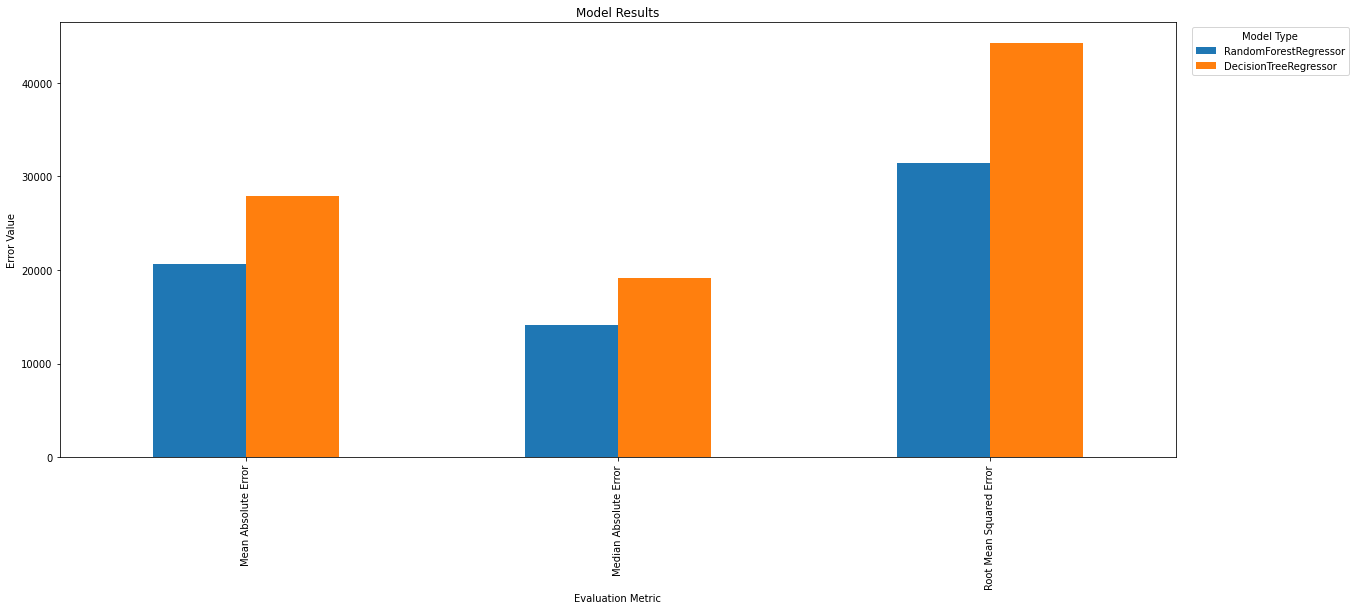

In [10]:
def visualise_results(results):
    results = pd.DataFrame(results, index=['Mean Absolute Error', 'Median Absolute Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error', 'Mean Squared Log Error', 'R2 Score'])
    print(results)
    error_results_bar = results[:3].plot.bar(figsize=(20, 8), xlabel='Evaluation Metric', ylabel='Error Value', title='Model Results')
    error_results_bar.legend(title='Model Type', bbox_to_anchor=(1.01, 1));

print('Initial Test Results')
visualise_results(initial_results)

## MODEL TUNING AND IMPROVEMENT

##### TUNE AND TRAIN RANDOMFORESTREGRESSOR

In [ ]:
gs_randForest_grid = {'n_estimators': [500, 600, 700, 800, 900],
                      'max_features': ['auto', 'sqrt'],
                      'max_depth': [35, 39, 45],
                      'min_samples_split': [2, 3, 4],
                      'min_samples_leaf': [1, 3, 5],
                      'bootstrap': [True, False]}
gs_randForest = GridSearchCV(estimator=initial_models['RandomForestRegressor'],
                             param_grid=gs_randForest_grid,
                             cv=5,
                             verbose=2)
gs_randForest.fit(X_train, y_train)

##### SHOW BEST PARAMETERS FOR RANDOMFORESTREGRESSOR MODEL

In [12]:
randForBestParams = gs_randForest.best_params_
print(pd.DataFrame(randForBestParams, index=['RandomForestRegressor']).transpose())

                  RandomForestRegressor
bootstrap                          True
max_depth                            39
max_features                       auto
min_samples_leaf                      1
min_samples_split                     2
n_estimators                        700


##### TUNE AND TRAIN DECISIONTREEREGRESSOR

In [ ]:
gs_decTreeReg_grid={"splitter": ["best", "random"],
                    "max_depth" : [None, 1, 3, 5],
                    "min_samples_leaf": [1, 3, 5, 7],
                    "min_weight_fraction_leaf": [0.0001, 0.000013, 0.00017],
                    "max_features": ["auto", "sqrt"],
                    "max_leaf_nodes": [None, 10, 40, 80]}
gs_decTreeReg = GridSearchCV(estimator=initial_models['DecisionTreeRegressor'],
                             param_grid=gs_decTreeReg_grid,
                             cv=5,
                             verbose=2)
gs_decTreeReg.fit(X_train, y_train)

##### SHOW BEST PARAMETERS FOR DECISIONTREEREGRESSOR

In [14]:
decTreeBestParams = gs_decTreeReg.best_params_
print(pd.DataFrame(decTreeBestParams, index=['DecisionTreeRegressor']).transpose())

                         DecisionTreeRegressor
max_depth                                 None
max_features                              auto
max_leaf_nodes                            None
min_samples_leaf                             1
min_weight_fraction_leaf              0.000013
splitter                                  best


##### INITIALISE AND TEST TUNED MODELS

In [15]:
tuned_models = {'RandomForestRegressor': gs_randForest,
                'DecisionTreeRegressor': gs_decTreeReg}

tuned_results = evaluate_models(tuned_models, X_test, y_test)

Testing RandomForestRegressor Model...
Testing DecisionTreeRegressor Model...


##### VISUALISE TUNED MODEL RESULTS

Tuned Test Results
                                RandomForestRegressor  DecisionTreeRegressor
Mean Absolute Error                      20510.187636           26677.326188
Median Absolute Error                    14141.569016           17666.666667
Root Mean Squared Error                  31251.613185           41680.608863
Mean Absolute Percentage Error               0.044608               0.057893
Mean Squared Log Error                       0.003975               0.006972
R2 Score                                     0.961941               0.932301


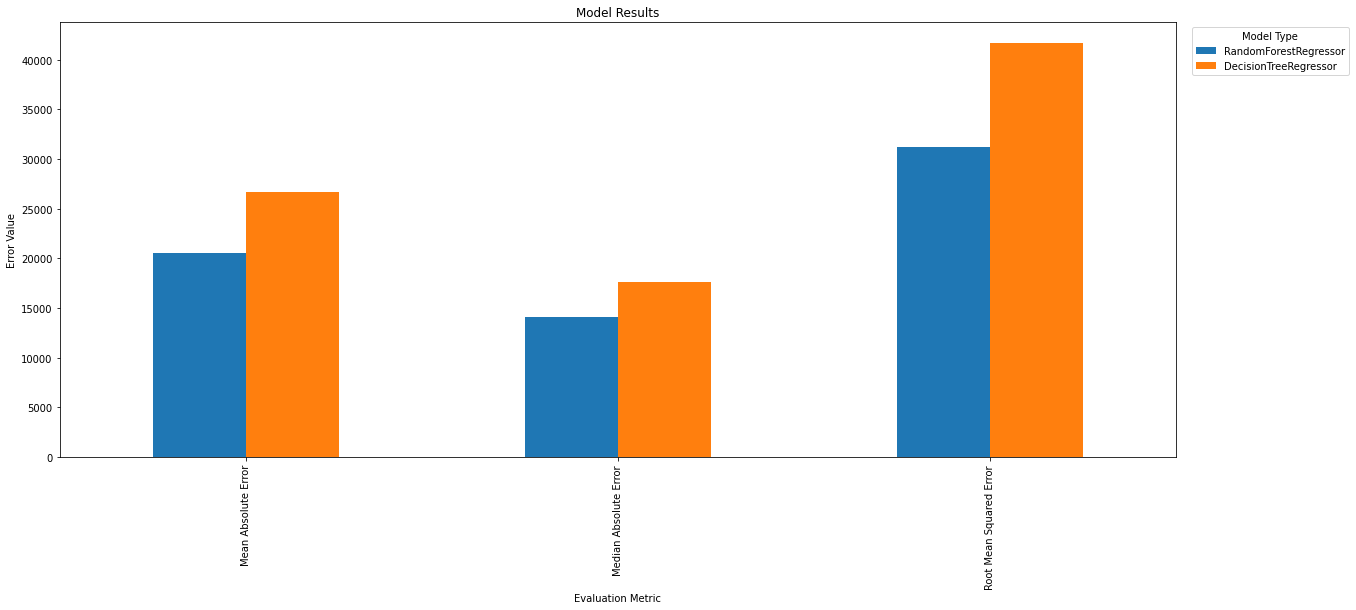

In [16]:
print('Tuned Test Results')
visualise_results(tuned_results)

## MODEL EVALUATION
- RANDOMFORESTREGRESSOR OUTPERFORMS DECISIONTREEREGRESSOR AFTER TUNING, HENCE RANDOMFORESTREGRESSOR WILL BE FAVOURED OVER DECISIONTREEREGRESSOR

##### FEATURE IMPORTANCE

,RandomForestRegressor
remaining_lease,0.013565
flat_type,0.028148
month,0.041736
block,0.042517
flat_model,0.043068
street_name,0.056779
lease_commence_date,0.099202
town,0.125446
storey_range,0.125484
floor_area_sqm,0.424054


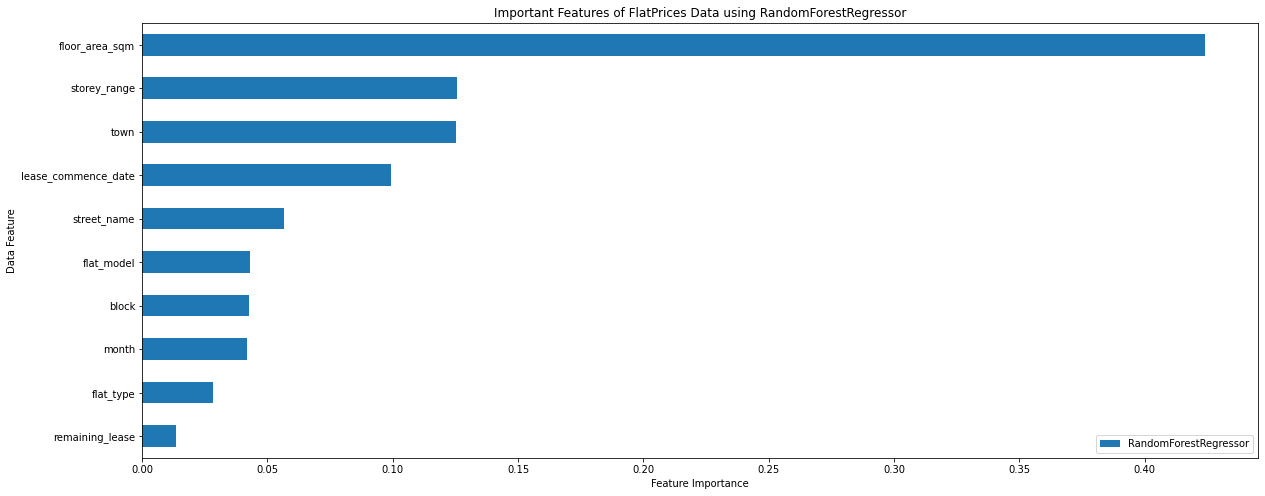

In [17]:
featImptData = {'RandomForestRegressor': initial_models['RandomForestRegressor'].feature_importances_,}
featImptFig, featImptAx = plt.subplots(figsize=(20, 8))
featImpt = pd.DataFrame(featImptData, index=list(X.columns)).sort_values('RandomForestRegressor')
featImpt.plot.barh(ax=featImptAx)
featImptAx.set(xlabel='Feature Importance', ylabel='Data Feature', title='Important Features of FlatPrices Data using RandomForestRegressor');
featImpt

## SAVE AND LOAD MODEL

##### SAVE MODEL

In [18]:
dump(gs_randForest, filename='FlatPricesModel.joblib')

['FlatPricesModel.joblib']

##### LOAD MODEL AND ENSURE SUCCESSFUL LOADING OF MODEL

Testing FlatPricesModel Model...
                                FlatPricesModel
Mean Absolute Error                20510.187636
Median Absolute Error              14141.569016
Root Mean Squared Error            31251.613185
Mean Absolute Percentage Error         0.044608
Mean Squared Log Error                 0.003975
R2 Score                               0.961941


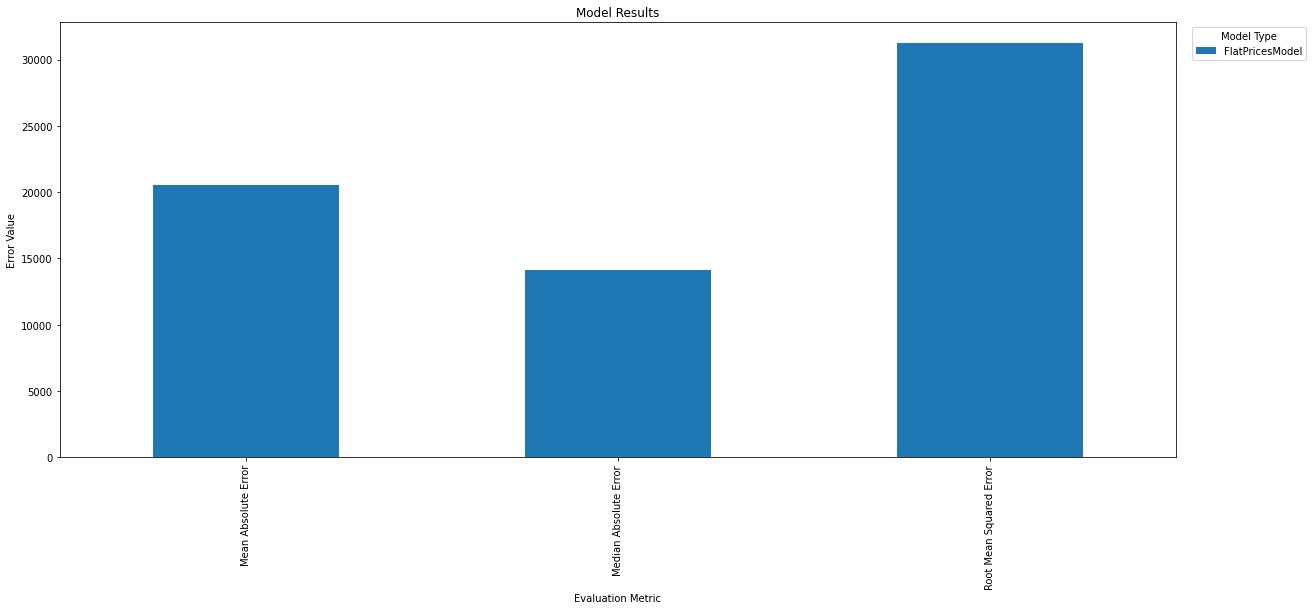

In [19]:
flatPricesModel = load(filename='FlatPricesModel.joblib')
loaded_model = {'FlatPricesModel': flatPricesModel}
loadedModelResults = evaluate_models(loaded_model, X_test, y_test)
visualise_results(loadedModelResults)